In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
#Change directory to access advertising.csv
os.chdir(r'C:\Users\User\Downloads')




In [78]:
#Read in the advertising data: it has: TV, Radio, Newspaper, and Sales rows ($)
df = pd.read_csv('advertising.csv')

#Read in the features which are the TV advertising money, Radio advertising money, and Newspaper advertising money
x = df.iloc[1:150,:3].values.astype(np.float64)

#Read in the target variable which is the Sales row
y = df.iloc[1:150,3].values.astype(np.float64)

x_test = df.iloc[150:,:3].values.astype(np.float64)
y_test = df.iloc[150:,3].values.astype(np.float64)
#Normalizing the data by calculating the mean and standard deviation to perform this calculation: (x-mean)/std
means = np.mean(x, axis=0)
stds = np.std(x, axis=0)
x = (x - means) / stds

means = np.mean(x_test, axis=0)
stds = np.std(x_test, axis=0)
x_test = (x_test - means) / stds
#Initialize variables for gradient descent to be used later 
w = np.array([0.0, 0.0, 0.0])
b = 0.0
num_iters = 1000
alpha = 0.01


In [79]:
#Computing the cost function via calculating the dot product to make our prediction and subtracting that from the actual 
def compute_cost(x,y,w,b):
    
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        
        prediction = np.dot(x[i],w) + b
        
        total_cost += (prediction - y[i])**2
    
    total_cost /= (2 * m)
    
    return total_cost
    
    
    

In [80]:

#Calculating the partial derivatives in respect to w and b
def gradients(x,y,w,b):
    
    m,n = x.shape
    w_der = np.zeros_like(w)
    b_der = 0.0
    for i in range(m):
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n):
            w_der[j] += (err) * float(x[i,j])
        b_der += (err)
    w_der /= m
    b_der /= m
    
    return w_der,b_der
      

In [81]:

#Gradient descent function which takes in cost and gradients function
def gradient_descent(x,y,w,b,num_iters,alpha,compute_cost,gradients):
    J_history = []
    
    
    for i in range(num_iters):
        w_F,b_F = gradients(x,y,w,b)
        
        w = w -(alpha * w_F)
        b = b -(alpha* b_F)
    
       # if i < 10000:
        J_history.append(compute_cost(x,y,w,b))
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    
    return w,b,J_history
    

In [82]:
#Calling gradient descent function which prints out the iteration and the cost (which is constantly appended to J_history even iteration)
w_F, b_F, J_historydude = gradient_descent(x,y,w,b,num_iters,alpha,compute_cost,gradients)

Iteration    0: Cost   110.74
Iteration  100: Cost    15.92
Iteration  200: Cost     3.39
Iteration  300: Cost     1.70
Iteration  400: Cost     1.47
Iteration  500: Cost     1.44
Iteration  600: Cost     1.43
Iteration  700: Cost     1.43
Iteration  800: Cost     1.43
Iteration  900: Cost     1.43


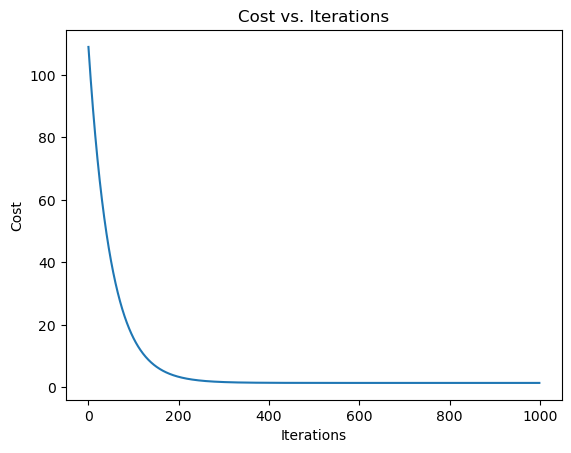

In [83]:
#Plotting number of iterations on x-axis vs. the cost function on the y-axis showing the minimization of the cost function
plt.plot(range(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [91]:
m,_ = x_test.shape
prediction = np.zeros(m)

for i in range(m):
    print(f"prediction: {np.dot(x_test[i], w_F) + b_F:0.2f}, target value: {y_test[i]}")
    prediction[i] = np.dot(x_test[i],w_F) + b_F


prediction: 18.93, target value: 16.1
prediction: 10.29, target value: 11.6
prediction: 16.75, target value: 16.6
prediction: 18.45, target value: 19.0
prediction: 15.89, target value: 15.6
prediction: 5.41, target value: 3.2
prediction: 15.43, target value: 15.3
prediction: 10.42, target value: 10.1
prediction: 10.31, target value: 7.3
prediction: 12.67, target value: 12.9
prediction: 14.56, target value: 14.4
prediction: 13.63, target value: 13.3
prediction: 15.33, target value: 14.9
prediction: 17.62, target value: 18.0
prediction: 11.37, target value: 11.9
prediction: 14.69, target value: 11.9
prediction: 10.79, target value: 8.0
prediction: 13.86, target value: 12.2
prediction: 17.55, target value: 17.1
prediction: 18.57, target value: 15.0
prediction: 7.57, target value: 8.4
prediction: 14.66, target value: 14.5
prediction: 7.68, target value: 7.6
prediction: 12.40, target value: 11.7
prediction: 14.29, target value: 11.5
prediction: 25.15, target value: 27.0
prediction: 20.42, t

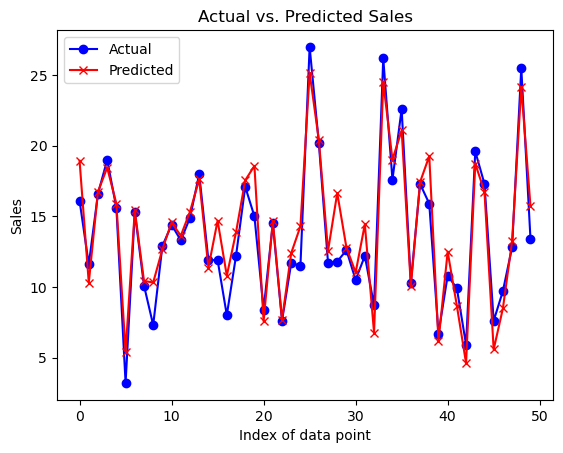

In [101]:
#Plotting number of iterations on x-axis vs. the cost function on the y-axis showing the minimization of the cost function

plt.plot(y_test, label="Actual", color='blue', marker='o')
plt.plot(prediction, label="Predicted", color='red', marker='x')
plt.xlabel('Index of data point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(loc='upper left')
plt.show()

In [5]:

!jupyter nbconvert --to webpdf Advertising_Regression.ipynb --allow-chromium-download


[NbConvertApp] Converting notebook Advertising_Regression.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 193742 bytes to Advertising_Regression.pdf
Task was destroyed but it is pending!
task: <Task pending name='Task-2' coro=<Connection.run() running at C:\Users\User\anaconda3\Lib\site-packages\playwright\_impl\_connection.py:281> wait_for=<Future pending cb=[Task.task_wakeup()]>>
Exception ignored in: <function _ProactorBasePipeTransport.__del__ at 0x00000224AEF96B60>
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\asyncio\proactor_events.py", line 116, in __del__
    _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\asyncio\proactor_events.py", line 80, in __repr__
    info.append(f'fd={self._sock.fileno()}')
                      ^^^^^^^^^^^